### 1. Collecting Movie Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
#Read in data
df = pd.read_csv("C:\\Users\\taylo\\Desktop\\GA\\Capstone\\the-movies-dataset\\movies_metadata.csv")

C:\Users\taylo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checks out column names
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
#Looks at DF head
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
#Gets general sense of DF numbers
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## 2. Data Cleaning

In [6]:
#Renaming Columns
df.rename(columns={'adult': 'Adult'}, inplace=True)
df.rename(columns={'belongs_to_collection': 'Belongs To Collection'}, inplace=True)
df.rename(columns={'budget': 'Budget'}, inplace=True)
df.rename(columns={'genres': 'Genres'}, inplace=True)
df.rename(columns={'homepage': 'Homepage'}, inplace=True)
df.rename(columns={'id': 'ID'}, inplace=True)
df.rename(columns={'imdb_id': 'IMDB_id'}, inplace=True)
df.rename(columns={'original_language': 'Original Language'}, inplace=True)
df.rename(columns={'original_title': 'Original Title'}, inplace=True)
df.rename(columns={'overview': 'Overview'}, inplace=True)
df.rename(columns={'popularity': 'Popularity'}, inplace=True)
df.rename(columns={'poster_path': 'Poster Path'}, inplace=True)
df.rename(columns={'production_companies': 'Production Companies'}, inplace=True)
df.rename(columns={'production_countries': 'Production Countries'}, inplace=True)
df.rename(columns={'release_date': 'Release Date'}, inplace=True)
df.rename(columns={'revenue': 'Revenue'}, inplace=True)
df.rename(columns={'runtime': 'Runtime'}, inplace=True)
df.rename(columns={'spoken_languages': 'Spoken Languages'}, inplace=True)
df.rename(columns={'status': 'Status'}, inplace=True)
df.rename(columns={'tagline': 'Tagline'}, inplace=True)
df.rename(columns={'title': 'Title'}, inplace=True)
df.rename(columns={'video': 'Video'}, inplace=True)
df.rename(columns={'vote_average': 'Vote Average'}, inplace=True)
df.rename(columns={'vote_count': 'Vote Count'}, inplace=True)

In [7]:
#Confirming columns rename
df.columns

Index(['Adult', 'Belongs To Collection', 'Budget', 'Genres', 'Homepage', 'ID',
       'IMDB_id', 'Original Language', 'Original Title', 'Overview',
       'Popularity', 'Poster Path', 'Production Companies',
       'Production Countries', 'Release Date', 'Revenue', 'Runtime',
       'Spoken Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Vote Average', 'Vote Count'],
      dtype='object')

In [8]:
#Checks data type of Release Date
df['Release Date'].dtype

dtype('O')

In [9]:
#Changing Release Date to Release Month
df['Month'] = pd.to_datetime(df['Release Date'],  errors='coerce').dt.month

In [10]:
#Adding in Release Month Column
df['Month'] = df['Month']

In [11]:
#Creating blank column for Season Released
df["Season Released"] = ""
df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Runtime,Spoken Languages,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10.0,
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,12.0,
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,


In [12]:
#Mapping each Release Month to a season released 
df.loc[df.Month == 1.0, 'Season Released'] = '1' 
df.loc[df.Month == 2.0, 'Season Released'] = '1'
df.loc[df.Month == 3.0, 'Season Released'] = '2' 
df.loc[df.Month == 4.0, 'Season Released'] = '2' 
df.loc[df.Month == 5.0, 'Season Released'] = '2' 
df.loc[df.Month == 6.0, 'Season Released'] = '3' 
df.loc[df.Month == 7.0, 'Season Released'] = '3' 
df.loc[df.Month == 8.0, 'Season Released'] = '3' 
df.loc[df.Month == 9.0, 'Season Released'] = '4' 
df.loc[df.Month == 10.0, 'Season Released'] = '4' 
df.loc[df.Month == 11.0, 'Season Released'] = '4' 
df.loc[df.Month == 12.0, 'Season Released'] = '1' 

df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Runtime,Spoken Languages,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10.0,4
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,1
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,12.0,1
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,1


In [13]:
#Check nulls
df.isnull().sum()

Adult                        0
Belongs To Collection    40972
Budget                       0
Genres                       0
Homepage                 37684
ID                           0
IMDB_id                     17
Original Language           11
Original Title               0
Overview                   954
Popularity                   5
Poster Path                386
Production Companies         3
Production Countries         3
Release Date                87
Revenue                      6
Runtime                    263
Spoken Languages             6
Status                      87
Tagline                  25054
Title                        6
Video                        6
Vote Average                 6
Vote Count                   6
Month                       90
Season Released              0
dtype: int64

In [14]:
df.Popularity.describe()

count     45461
unique    44176
top         0.0
freq         34
Name: Popularity, dtype: object

In [15]:
#Check data types
df.dtypes

Adult                     object
Belongs To Collection     object
Budget                    object
Genres                    object
Homepage                  object
ID                        object
IMDB_id                   object
Original Language         object
Original Title            object
Overview                  object
Popularity                object
Poster Path               object
Production Companies      object
Production Countries      object
Release Date              object
Revenue                  float64
Runtime                  float64
Spoken Languages          object
Status                    object
Tagline                   object
Title                     object
Video                     object
Vote Average             float64
Vote Count               float64
Month                    float64
Season Released           object
dtype: object

In [16]:
#Finding which columns in dataframe have 0 revenue
df[df.Revenue == 0].count()

Adult                    38052
Belongs To Collection     3007
Budget                   38052
Genres                   38052
Homepage                  5410
ID                       38052
IMDB_id                  38035
Original Language        38041
Original Title           38052
Overview                 37120
Popularity               38052
Poster Path              37671
Production Companies     38052
Production Countries     38052
Release Date             37969
Revenue                  38052
Runtime                  37801
Spoken Languages         38052
Status                   37973
Tagline                  14465
Title                    38052
Video                    38052
Vote Average             38052
Vote Count               38052
Month                    37969
Season Released          38052
dtype: int64

In [17]:
#Setting new dataframe to contain only movies without 0 for Revenue
df = df[df.Revenue != 0]

In [18]:
#Confirming no movies in dataframe have 0 revenue
df[df.Revenue == 0].count()

Adult                    0
Belongs To Collection    0
Budget                   0
Genres                   0
Homepage                 0
ID                       0
IMDB_id                  0
Original Language        0
Original Title           0
Overview                 0
Popularity               0
Poster Path              0
Production Companies     0
Production Countries     0
Release Date             0
Revenue                  0
Runtime                  0
Spoken Languages         0
Status                   0
Tagline                  0
Title                    0
Video                    0
Vote Average             0
Vote Count               0
Month                    0
Season Released          0
dtype: int64

In [19]:
#Checking length of new dataframe
len(df)

7414

In [20]:
#Change Budget columns to floats and confirm change
df['Budget'] = pd.to_numeric(df['Budget'],errors='coerce')
df['Budget'].dtype

dtype('float64')

In [21]:
#Change season released to floats and confirm change
df['Season Released'] = pd.to_numeric(df['Season Released'],errors='coerce')
df['Season Released'].dtype

dtype('float64')

In [22]:
#Change popularity type from object to float
df.Popularity.dtypes
df['Popularity'] = pd.to_numeric(df['Popularity'],errors='coerce')
df.Popularity.dtypes

dtype('float64')

In [23]:
#See format of Genres
eval(df['Genres'][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [24]:
#for each of the rows in Genres, pull all genres and use to run correlation
genres = []
genreslist = []
#Going through df and getting genres
for string in df['Genres']:
    #Getting rid of strings for each list in Genres 
    lst = eval(string)
    #If list has Genre info, create empty list in OMG
    if len(lst) > 0:
        onemoviesgenres = []
        #Going through each dict in list, getting list of genres
        for j in range(len(lst)):
            onegenre= lst[j]["name"]
            onemoviesgenres.append(onegenre)
        genreslist.append(onemoviesgenres)
        
        #Picking out primary genre for each movie
        genre = lst[0]["name"]
        genres.append(genre)
    else:
        genres.append('NA')
        genreslist.append('NA')

In [25]:
#Creates new column for primary genre and all genres
df['Primary Genre'] = genres
df['List of Genres'] = genreslist
df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released,Primary Genre,List of Genres
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,10.0,4.0,Animation,"[Animation, Comedy, Family]"
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,1.0,Adventure,"[Adventure, Fantasy, Family]"
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,1.0,Comedy,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,1.0,Comedy,[Comedy]
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,12.0,1.0,Action,"[Action, Crime, Drama, Thriller]"


In [26]:
#Creates placeholder for all unique values in Primary genre column
for genre in df['Primary Genre'].unique():
    #creates dataframe that contains all instances where Primary Genre is unique value
    df_for = df.loc[df['Primary Genre'] == genre]
    #prints length of PG and Genre name
    print(len(df_for['Primary Genre']))
    print(genre)

189
Animation
478
Adventure
1570
Comedy
1196
Action
79
Family
39
History
1937
Drama
334
Crime
182
Fantasy
116
Science Fiction
49
Music
403
Horror
188
Documentary
176
Romance
91
Mystery
259
Thriller
50
War
44
Western
23
NA
6
Foreign
2
TV Movie
1
Carousel Productions
1
Aniplex
1
Odyssey Media


In [27]:
#Checks number of unqiue genres for movies in dataframe
df['Primary Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Family', 'History',
       'Drama', 'Crime', 'Fantasy', 'Science Fiction', 'Music', 'Horror',
       'Documentary', 'Romance', 'Mystery', 'Thriller', 'War', 'Western',
       'NA', 'Foreign', 'TV Movie', 'Carousel Productions', 'Aniplex',
       'Odyssey Media'], dtype=object)

In [28]:
#Creates placeholder for all unique values in Primary genre column
for genre in df['Primary Genre'].unique():
    #creates dataframe that contains all instances where Primary Genre is unique value
    df_50 = df.loc[df['Primary Genre'] == genre]
    #prints length of PG and Genre name
    if len(df_50['Primary Genre']) <= 50 :
        print(len(df_50['Primary Genre']))
        print(genre)

39
History
49
Music
50
War
44
Western
23
NA
6
Foreign
2
TV Movie
1
Carousel Productions
1
Aniplex
1
Odyssey Media


In [29]:
df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released,Primary Genre,List of Genres
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,10.0,4.0,Animation,"[Animation, Comedy, Family]"
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,1.0,Adventure,"[Adventure, Fantasy, Family]"
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,1.0,Comedy,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,1.0,Comedy,[Comedy]
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,12.0,1.0,Action,"[Action, Crime, Drama, Thriller]"


In [30]:
#List of genres that have less than 50 observations to remove
genres_remove = ['History', 'Music', 'War', 'Western', 'NA', 'Foreign', 'TV Movie', 'Carousel Productions', 'Aniplex', 'Odyssey Media']

In [31]:
#For loop to set df without removed genres 
for genre in genres_remove:
    df = df[df['Primary Genre'] != genre]

In [32]:
#Confirming genres removed
df['Primary Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Family', 'Drama',
       'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Documentary',
       'Romance', 'Mystery', 'Thriller'], dtype=object)

In [33]:
#Creates dummy variable 
df_pg = pd.get_dummies(df['Primary Genre'])

In [34]:
#DF 
df_1 = pd.concat([df, df_pg], axis=1)
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Crime,Documentary,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,0,0,0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,0,0,0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,0,0,0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,0,0,0
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Sees data 
df_1.sum()

Adult                FalseFalseFalseFalseFalseFalseFalseFalseFalseF...
Budget                                                     1.64002e+11
Genres               [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
ID                   8628844313571186294990917109087210321408524458...
IMDB_id              tt0114709tt0113497tt0114885tt0113041tt0113277t...
Original Language    enenenenenenenenenenenenenenenenenenenfrenenen...
Original Title       Toy StoryJumanjiWaiting to ExhaleFather of the...
Popularity                                                     61707.2
Revenue                                                    5.01919e+11
Runtime                                                         772712
Video                                                                0
Vote Average                                                   44717.8
Vote Count                                                 4.07672e+06
Month                                                            49195
Season

In [36]:
#Checks names of columns in dataframe
df_1.columns

Index(['Adult', 'Belongs To Collection', 'Budget', 'Genres', 'Homepage', 'ID',
       'IMDB_id', 'Original Language', 'Original Title', 'Overview',
       'Popularity', 'Poster Path', 'Production Companies',
       'Production Countries', 'Release Date', 'Revenue', 'Runtime',
       'Spoken Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Vote Average', 'Vote Count', 'Month', 'Season Released',
       'Primary Genre', 'List of Genres', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Horror', 'Mystery', 'Romance', 'Science Fiction', 'Thriller'],
      dtype='object')

In [37]:
#Confirms dataframe contains only unique Genres 
df_1['Primary Genre'].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Family', 'Drama',
       'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Documentary',
       'Romance', 'Mystery', 'Thriller'], dtype=object)

In [38]:
#Confirms List of Genres formatting correctly as an example
df_1['List of Genres'][0]

['Animation', 'Comedy', 'Family']

In [39]:
#Check correlations
df_1.corr()

,Budget,Popularity,Revenue,Runtime,Vote Average,Vote Count,Month,Season Released,Action,Adventure,...,Crime,Documentary,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
Budget,1.000000,0.339226,0.745833,0.218812,0.028364,0.622118,0.037139,-0.014766,0.165690,0.230195,...,-0.031952,-0.096033,-0.152945,0.052404,0.058594,-0.075396,-0.020613,-0.034771,0.074644,-0.003830
Popularity,0.339226,1.000000,0.457221,0.115687,0.161939,0.495974,0.018187,0.012889,0.067963,0.069191,...,-0.002827,-0.075457,-0.063354,0.092844,0.014427,0.012386,0.020163,-0.025999,0.055770,0.021284
Revenue,0.745833,0.457221,1.000000,0.207744,0.151905,0.781872,0.036921,-0.020461,0.097715,0.192190,...,-0.043398,-0.071113,-0.132563,0.073662,0.040687,-0.045040,-0.018235,-0.016230,0.069037,-0.013708
Runtime,0.218812,0.115687,0.207744,1.000000,0.300079,0.218275,0.125611,-0.002438,0.059501,0.062463,...,0.032259,-0.075161,0.205566,-0.067091,-0.018241,-0.117810,-0.009317,-0.000092,0.018948,0.008432
Vote Average,0.028364,0.161939,0.151905,0.300079,1.000000,0.273734,0.092543,0.028544,-0.078941,0.028446,...,0.064651,0.041089,0.156697,-0.008190,-0.007328,-0.101364,0.000739,-0.018287,-0.002671,-0.024939
Vote Count,0.622118,0.495974,0.781872,0.218275,0.273734,1.000000,0.033412,0.004752,0.094623,0.152246,...,-0.011294,-0.074676,-0.098584,0.028067,0.035172,-0.016636,-0.007458,-0.022194,0.100936,0.017220
Month,0.037139,0.018187,0.036921,0.125611,0.092543,0.033412,1.000000,0.532955,-0.047287,0.022869,...,-0.004622,-0.025588,0.089776,-0.002818,-0.015531,-0.008832,-0.014769,-0.020564,-0.004608,-0.001737
Season Released,-0.014766,0.012889,-0.020461,-0.002438,0.028544,0.004752,0.532955,1.000000,-0.037250,-0.008005,...,0.009930,0.018874,0.044090,0.020192,-0.015489,0.020328,0.011036,-0.001033,0.003165,0.001649
Action,0.165690,0.067963,0.097715,0.059501,-0.078941,0.094623,-0.047287,-0.037250,1.000000,-0.119055,...,-0.098470,-0.073103,-0.270862,-0.047024,-0.071897,-0.108711,-0.050512,-0.070671,-0.057131,-0.086242
Adventure,0.230195,0.069191,0.192190,0.062463,0.028446,0.152246,0.022869,-0.008005,-0.119055,1.000000,...,-0.058832,-0.043677,-0.161830,-0.028095,-0.042956,-0.064951,-0.030179,-0.042224,-0.034133,-0.051527


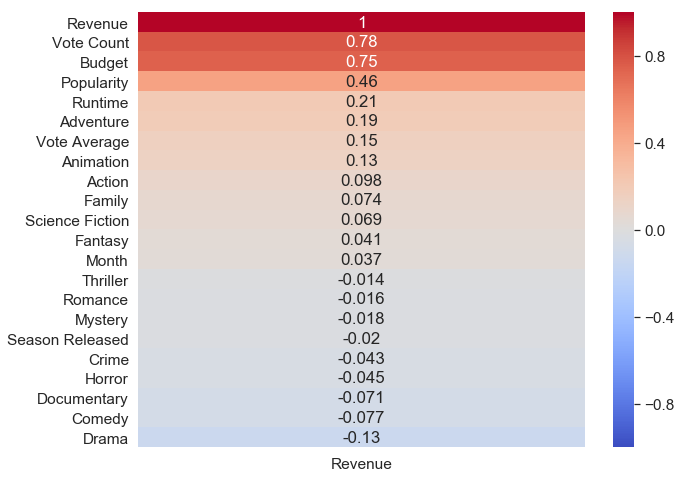

In [40]:
#Seaborn HeatMap
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(df_1.corr()[['Revenue']].sort_values('Revenue', ascending=False),vmin=-1,cmap='coolwarm',annot=True);

In [41]:
#Confirms List of Genres formatting correctly as an example
df_1['List of Genres'][0]

['Animation', 'Comedy', 'Family']

In [42]:
#Runs describe to get sense of numbers for each columns
df_1.describe()

,Budget,Popularity,Revenue,Runtime,Vote Average,Vote Count,Month,Season Released,Action,Adventure,...,Crime,Documentary,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller
count,7.198000e+03,7196.000000,7.196000e+03,7191.000000,7196.000000,7196.000000,7195.000000,7195.000000,7198.000000,7198.000000,...,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000
mean,2.278434e+07,8.575205,6.974975e+07,107.455430,6.214258,566.525848,6.837387,2.592634,0.166157,0.066407,...,0.046402,0.026118,0.269103,0.010975,0.025285,0.055988,0.012642,0.024451,0.016116,0.035982
std,3.715509e+07,12.290457,1.478929e+08,21.158648,1.013983,1113.110457,3.385765,1.134971,0.372248,0.249010,...,0.210368,0.159498,0.443524,0.104194,0.157000,0.229914,0.111733,0.154456,0.125929,0.186259
min,0.000000e+00,0.000001,1.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,3.998489,2.411482e+06,94.000000,5.700000,42.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000e+06,7.482195,1.710438e+07,104.000000,6.300000,164.000000,7.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.900000e+07,10.953738,6.839415e+07,117.000000,6.900000,548.000000,10.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,547.488298,2.787965e+09,338.000000,10.000000,14075.000000,12.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2. Creating new Revenue Columns

In [43]:
#Creates new column with each movie ranked by revenue decile
df_1['Decile Rank']=pd.qcut(df_1['Revenue'].rank(method='first'), 10,labels=False)
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Documentary,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,0,0,9.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,0,0,9.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,0,0,7.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,0,0,7.0
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,0,0,9.0


In [44]:
#Checks tiers of Decile Revenue
df_1.groupby('Decile Rank').Revenue.agg(['min', 'max'])

,min,max
Decile Rank,,
0.0,1.0,1.836400e+05
1.0,183700.0,1.296971e+06
2.0,1300000.0,4.152230e+06
3.0,4159678.0,9.488998e+06
4.0,9489829.0,1.709605e+07
5.0,17112713.0,2.953630e+07
6.0,29657751.0,5.054911e+07
7.0,50650079.0,9.197482e+07
8.0,92180910.0,1.849255e+08


In [45]:
#Sets group to do Decile Rank analysis
decile_groups = df_1.groupby('Decile Rank')

In [46]:
#Checks description of Decile Ranks
decile_groups['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Decile Rank,,,,,,,,
0.0,720.0,4.972969e+04,5.313444e+04,1.0,5.154500e+03,30226.0,8.540925e+04,1.836400e+05
1.0,720.0,6.217486e+05,3.297182e+05,183700.0,3.203192e+05,549660.0,8.777990e+05,1.296971e+06
2.0,719.0,2.545235e+06,8.360061e+05,1300000.0,1.795288e+06,2411594.0,3.221360e+06,4.152230e+06
3.0,720.0,6.586092e+06,1.509048e+06,4159678.0,5.278736e+06,6501182.0,7.898234e+06,9.488998e+06
4.0,719.0,1.298544e+07,2.231067e+06,9489829.0,1.100000e+07,12923936.0,1.481683e+07,1.709605e+07
5.0,720.0,2.260546e+07,3.649162e+06,17112713.0,1.941135e+07,22129531.5,2.550682e+07,2.953630e+07
6.0,719.0,3.909621e+07,5.972806e+06,29657751.0,3.403896e+07,38748395.0,4.393235e+07,5.054911e+07
7.0,720.0,6.927687e+07,1.196282e+07,50650079.0,5.941132e+07,68395319.5,7.887009e+07,9.197482e+07
8.0,719.0,1.313148e+08,2.729357e+07,92180910.0,1.071055e+08,126248813.0,1.548855e+08,1.849255e+08


In [47]:
#Creating new column for over 5 mill y/n and check
df_1["Over 5 Million"] = ""
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,0,9.0,
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,0,9.0,
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,0,7.0,
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,0,7.0,
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,0,9.0,


In [48]:
#Assign a 1 or 0 for each movie if they made more or less than $5 mill revenue, check 
df_1.loc[df.Revenue <= 5000000, 'Over 5 Million'] = '0' 
df_1.loc[df.Revenue > 5000000, 'Over 5 Million'] = '1'
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,0,9.0,1
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,0,9.0,1
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,0,7.0,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,0,7.0,1
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,0,9.0,1


In [49]:
#Creating new column for over 1 mill y/n and check
df_1["Over 1 Million"] = ""
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,9.0,1,
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,9.0,1,
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,7.0,1,
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,7.0,1,
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,9.0,1,


In [50]:
#Assign a 1 or 0 for each movie if they made more or less than $1 mill revenue, check 
df_1.loc[df.Revenue <= 1000000, 'Over 1 Million'] = '0' 
df_1.loc[df.Revenue > 1000000, 'Over 1 Million'] = '1'
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,9.0,1,1
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,9.0,1,1
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,7.0,1,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,7.0,1,1
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,9.0,1,1


In [51]:
#Checks number of movies with over $1 mill Revenue
df_1['Over 1 Million'].value_counts()

1    5887
0    1309
        2
Name: Over 1 Million, dtype: int64

In [52]:
#Checks number of movies with over $5 mill Revenue
df_1['Over 5 Million'].value_counts()

1    4888
0    2308
        2
Name: Over 5 Million, dtype: int64

In [53]:
#Prints df_2 shape before and after droping nulls
print(df_1.shape)
df_1.dropna(subset=['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released', 'Revenue', 'Over 1 Million', 'Over 5 Million'] , inplace = True)
print(df_1.shape)

(7198, 45)
(7190, 45)


In [54]:
#Confirms all nulls in specified dataframe columns gone
df_1.isnull().sum()

Adult                       0
Belongs To Collection    5725
Budget                      0
Genres                      0
Homepage                 4865
ID                          0
IMDB_id                     0
Original Language           0
Original Title              0
Overview                   15
Popularity                  0
Poster Path                 0
Production Companies        0
Production Countries        0
Release Date                0
Revenue                     0
Runtime                     0
Spoken Languages            0
Status                      1
Tagline                  1389
Title                       0
Video                       0
Vote Average                0
Vote Count                  0
Month                       0
Season Released             0
Primary Genre               0
List of Genres              0
Action                      0
Adventure                   0
Animation                   0
Comedy                      0
Crime                       0
Documentar

In [55]:
#Change Over 1 Million type from object to float
df_1[['Over 1 Million']].dtypes
df_1['Over 1 Million'] = pd.to_numeric(df_1['Over 1 Million'],errors='coerce')
df_1[['Over 1 Million']].dtypes

Over 1 Million    int64
dtype: object

In [56]:
#Change popularity type from object to float
df_1[['Over 5 Million']].dtypes
df_1['Over 5 Million'] = pd.to_numeric(df_1['Over 5 Million'],errors='coerce')
df_1[['Over 5 Million']].dtypes

Over 5 Million    int64
dtype: object

# Running Models

In [57]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
#Instantiate LR Model
model = LinearRegression()

In [59]:
#Sees max revenue
df_1['Revenue'].max()

2787965087.0

In [60]:
#Set new dataframe with columns I'll be using
df_2 = df_1[['Title', 'Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Revenue', 'Season Released']]
df_2.head()

,Title,Popularity,Budget,Runtime,Vote Average,Vote Count,Revenue,Season Released
0,Toy Story,21.946943,30000000.0,81.0,7.7,5415.0,373554033.0,4.0
1,Jumanji,17.015539,65000000.0,104.0,6.9,2413.0,262797249.0,1.0
3,Waiting to Exhale,3.859495,16000000.0,127.0,6.1,34.0,81452156.0,1.0
4,Father of the Bride Part II,8.387519,0.0,106.0,5.7,173.0,76578911.0,1.0
5,Heat,17.924927,60000000.0,170.0,7.7,1886.0,187436818.0,1.0


In [61]:
#Checks for nulls in dataframe
df_2.isnull().sum()

Title              0
Popularity         0
Budget             0
Runtime            0
Vote Average       0
Vote Count         0
Revenue            0
Season Released    0
dtype: int64

In [62]:
#Prints before and after shape to confirm nulls dropped
print(df_2.shape)
df_2.dropna(subset=['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released', 'Revenue'] , inplace = True)
print(df_2.shape)

(7190, 8)
(7190, 8)


C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
#Confirms no nulls in dataframe
df_2.isnull().sum()

Title              0
Popularity         0
Budget             0
Runtime            0
Vote Average       0
Vote Count         0
Revenue            0
Season Released    0
dtype: int64

In [64]:
#List of columns in dataframe
df_2.columns

Index(['Title', 'Popularity', 'Budget', 'Runtime', 'Vote Average',
       'Vote Count', 'Revenue', 'Season Released'],
      dtype='object')

In [65]:
#Set variables
#Budget	Popularity	Revenue	Runtime	Vote Average	Vote Count
X = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y = df_2['Revenue']

In [66]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [67]:
#Confirms data types all numeric in dataframe
df_2.dtypes

Title               object
Popularity         float64
Budget             float64
Runtime            float64
Vote Average       float64
Vote Count         float64
Revenue            float64
Season Released    float64
dtype: object

In [68]:
#Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
#Gets score of model on training set
model.score(X_train, y_train)

0.7306323059818323

In [70]:
#Set Predctions and get model score
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.7141890925872845

In [71]:
#Gets model intercept
model.intercept_

-1048825.2560285926

In [72]:
#Gets model coefficients
model.coef_

array([ 8.10568338e+05,  1.63800694e+00,  3.75802945e+04, -1.47677920e+06,
        6.38973579e+04, -1.89401632e+06])

Text(0, 0.5, 'Actual')

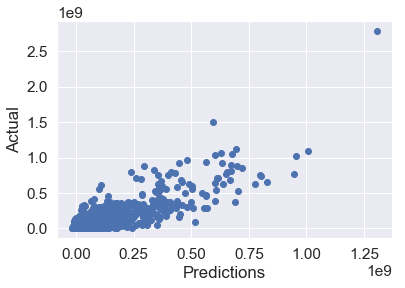

In [73]:
#Plot
import matplotlib.pyplot as plt
plt.scatter(y_predict, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

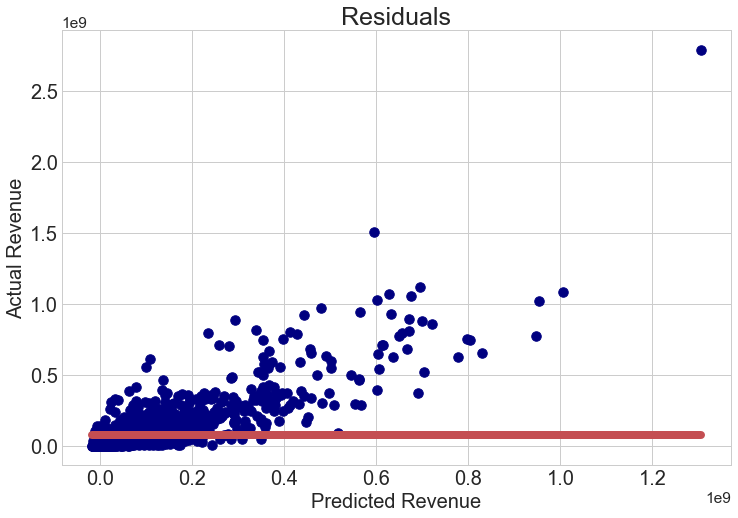

In [74]:
plt.figure(figsize = (12,8))
plt.style.use('seaborn-whitegrid')
plt.scatter(y_predict,y_test,c='navy',s=90);
plt.plot((np.min(y_predict), np.max(y_predict)),
        (np.mean(y_test), np.mean(y_test)),
       color='r',linewidth=8);

plt.title("Residuals",fontsize=25)
plt.xlabel("Predicted Revenue",fontsize=20)
plt.ylabel("Actual Revenue",fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 40769893.37186223
Mean Squared Error: 6689011536887086.0
Root Mean Squared Error: 81786377.45301528


In [76]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     2976.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:06:08   Log-Likelihood:                -98447.
No. Observations:                5033   AIC:                         1.969e+05
Df Residuals:                    5027   BIC:                         1.969e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Popularity       8.102e+05   9.15e+04     

In [77]:
#plot on log scale

In [78]:
#Gets r2 score
r2_score(y_test, lm_results.predict(X_test))

0.7141730466416902

In [79]:
#Sets Interaction Terms
interaction_terms = df_2[['Vote Count', 'Budget']]

In [80]:
#Sets variables
X2 = interaction_terms
y2 = df_2['Revenue']

In [81]:
#Train/Test Split
it_X_train, it_X_test, it_y_train, it_y_test = train_test_split(X2, y2, test_size=0.3)

In [82]:
# Create linear regression
regr_it = LinearRegression()

# Fit the linear regression
model_it = regr_it.fit(X2, y2)

In [83]:
#Gets model coefficients
model_it.coef_

array([6.89022252e+04, 1.68449534e+00])

In [84]:
model_it.intercept_

-7681318.037441611

In [85]:
model_it.score(it_X_train, it_y_train)

0.7186171808783408

In [86]:
model_it.score(it_X_test, it_y_test)

0.7261661848974644

In [87]:
#Sets predictions
predictions_it = model_it.predict(it_X_test)

In [88]:
predictions_it.shape

(2157,)

In [89]:
it_y_test.shape

(2157,)

Text(0, 0.5, 'Actual')

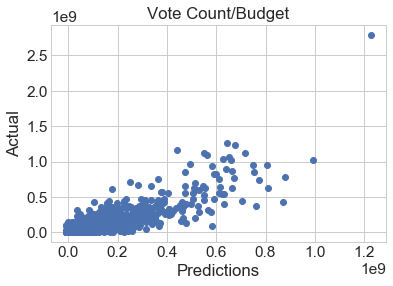

In [90]:
#Plot
plt.scatter(predictions_it, it_y_test)
plt.title("Vote Count/Budget")
plt.xlabel("Predictions")
plt.ylabel("Actual")

In [91]:
print('Mean Absolute Error:', metrics.mean_absolute_error(it_y_test, predictions_it))  
print('Mean Squared Error:', metrics.mean_squared_error(it_y_test, predictions_it))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(it_y_test, predictions_it)))

Mean Absolute Error: 39376683.04362445
Mean Squared Error: 6424611353048774.0
Root Mean Squared Error: 80153673.35967064


In [92]:
lm_it = sm.OLS(it_y_train, it_X_train)
lm_it_results = lm_it.fit()
print(lm_it_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     8388.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:06:08   Log-Likelihood:                -98564.
No. Observations:                5033   AIC:                         1.971e+05
Df Residuals:                    5031   BIC:                         1.971e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Vote Count  6.584e+04   1224.249     53.779      0.0

# Logistic Regression Model

In [93]:
#Check dataframe
df_1.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,9.0,1,1
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,9.0,1,1
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,7.0,1,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,7.0,1,1
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,9.0,1,1


In [94]:
#Confirms Data Types 
df_1.dtypes

Adult                     object
Belongs To Collection     object
Budget                   float64
Genres                    object
Homepage                  object
ID                        object
IMDB_id                   object
Original Language         object
Original Title            object
Overview                  object
Popularity               float64
Poster Path               object
Production Companies      object
Production Countries      object
Release Date              object
Revenue                  float64
Runtime                  float64
Spoken Languages          object
Status                    object
Tagline                   object
Title                     object
Video                     object
Vote Average             float64
Vote Count               float64
Month                    float64
Season Released          float64
Primary Genre             object
List of Genres            object
Action                     uint8
Adventure                  uint8
Animation 

In [95]:
#Sets new dataframe for different model
df_2 = df_1
df_2.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0,0,0,0,0,0,0,9.0,1,1
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0,0,0,0,0,0,0,9.0,1,1
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,0,0,0,0,0,0,0,7.0,1,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,0,0,0,0,0,0,0,7.0,1,1
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,0,0,0,0,0,0,0,9.0,1,1


In [96]:
#double check movie with 0 revenue

In [97]:
#Set X and Y variables
X3 = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y3 = df_2['Revenue']

In [98]:
#Confirms all nulls in specified dataframe columns gone
df_2.isnull().sum()

Adult                       0
Belongs To Collection    5725
Budget                      0
Genres                      0
Homepage                 4865
ID                          0
IMDB_id                     0
Original Language           0
Original Title              0
Overview                   15
Popularity                  0
Poster Path                 0
Production Companies        0
Production Countries        0
Release Date                0
Revenue                     0
Runtime                     0
Spoken Languages            0
Status                      1
Tagline                  1389
Title                       0
Video                       0
Vote Average                0
Vote Count                  0
Month                       0
Season Released             0
Primary Genre               0
List of Genres              0
Action                      0
Adventure                   0
Animation                   0
Comedy                      0
Crime                       0
Documentar

In [99]:
X3.dtypes

Popularity         float64
Budget             float64
Runtime            float64
Vote Average       float64
Vote Count         float64
Season Released    float64
dtype: object

In [100]:
y3.dtypes

dtype('float64')

In [101]:
#Set X and Y variables for LogReg
X3 = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y3 = df_2[['Over 5 Million']]

In [102]:
#Train/test split
lr1X_train, lr1X_test, lr1y_train, lr1y_test = train_test_split(X3, y3, random_state=2)

In [103]:
#Fit Log Reg Model
logreg = LogisticRegression()
lr_model = logreg.fit(lr1X_train, lr1y_train)

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
#Check Model score
lr_model.score(lr1X_train, lr1y_train)

0.6986275964391692

In [105]:
#Checks model score
lr_model.score(lr1X_test, lr1y_test)

0.7046718576195773

In [106]:
#Checks model coefficients
lr_model.coef_

array([[ 7.34542356e-14,  1.00768387e-07, -4.14185303e-13,
        -2.60669750e-14,  8.44376037e-12, -1.92557095e-14]])

In [107]:
#Set predictions
y_predict_lr = lr_model.predict(lr1X_test)

In [108]:
y_predict_lr.shape

(1798,)

In [109]:
lr1y_test.shape

(1798, 1)

In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [111]:
tn, fp, fn, tp = confusion_matrix(lr1y_test, y_predict_lr).ravel()
tn, fp, fn, tp

(31, 530, 1, 1236)

In [112]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = lr1y_test
predicted = y_predict_lr
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :'),accuracy_score(actual, predicted) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[  31  530]
 [   1 1236]]
Accuracy Score :
Report : 
              precision    recall  f1-score   support

           0       0.97      0.06      0.10       561
           1       0.70      1.00      0.82      1237

   micro avg       0.70      0.70      0.70      1798
   macro avg       0.83      0.53      0.46      1798
weighted avg       0.78      0.70      0.60      1798



In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(lr1y_test, y_predict_lr))  
print('Mean Squared Error:', metrics.mean_squared_error(lr1y_test, y_predict_lr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(lr1y_test, y_predict_lr)))

Mean Absolute Error: 0.2953281423804227
Mean Squared Error: 0.2953281423804227
Root Mean Squared Error: 0.5434410201488499


In [114]:
lm_logreg = sm.OLS(lr1y_train, lr1X_train)
lm_logreg_results = lm_logreg.fit()
print(lm_logreg_results.summary())

                            OLS Regression Results                            
Dep. Variable:         Over 5 Million   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2388.
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        01:06:08   Log-Likelihood:                -3101.7
No. Observations:                5392   AIC:                             6215.
Df Residuals:                    5386   BIC:                             6255.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Popularity          0.0031      0.001     

In [115]:
Model for $1 million threshold

SyntaxError: invalid syntax (<ipython-input-115-06e47dccfaee>, line 1)

In [ ]:
#Checks number of movies with over $1 mill Revenue
df_2['Over 1 Million'].value_counts()

In [ ]:
#Prints df_2 shape before and after droping nulls
print(df_2.shape)
df_2.dropna(subset=['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released', 'Revenue', 'Over 1 Million'] , inplace = True)
print(df_2.shape)

In [ ]:
#Confirms all nulls in specified dataframe columns gone
df_2.isnull().sum()

In [ ]:
#Confirms Over 1 Million is Object
df_2[['Over 1 Million']].dtypes

In [ ]:
#Set X and Y variables for LogReg
X3 = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y3a = df_2[['Over 1 Million']]

In [ ]:
#Train/test split
lr2X_train, lr2X_test, lr2y_train, lr2y_test = train_test_split(X3, y3a, random_state=2)

In [ ]:
#Fit Log Reg Model
logreg = LogisticRegression()
lr_model_2 = logreg.fit(lr2X_train, lr2y_train)

In [ ]:
#Check Model score
lr_model_2.score(lr2X_train, lr2y_train)

In [ ]:
lr_model_2.score(lr2X_test, lr2y_test)

# Random Forest

In [116]:
#Set variables for RF
X4 = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y4 = df_2[['Over 1 Million']]

In [118]:
#Train/test split
rfX_train, rfX_val, rfy_train, rfy_val = train_test_split(X4, y4, random_state=42)

In [119]:
#Instantiating random forest model
rf = RandomForestClassifier(n_estimators=100)

In [120]:
#Instantiating Extra Trees Classifier
et = ExtraTreesClassifier(n_estimators=100)

In [121]:
#Gets cross val score
cross_val_score(rf, rfX_train, rfy_train, cv=5).mean()

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

0.8477334570191711

In [122]:
#Gets cross val score for Extra Trees
cross_val_score(et, rfX_train, rfy_train, cv=5).mean()

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

0.8377166220023362

In [123]:
#Searches for best RF parameters 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(rfX_train, rfy_train)
print(gs.best_score_)
gs.best_params_

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

0.8455118694362018


{'max_depth': 5, 'n_estimators': 150}

In [124]:
#Gets score of RF train
gs.score(rfX_train, rfy_train)

0.8533011869436202

In [125]:
#Gets score of RF test
gs.score(rfX_val, rfy_val)

0.8442714126807565

In [128]:
#Sets parametrs for RF
clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=0)

In [129]:
#Checks importance of features
clf.fit(X4, y4)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(clf.feature_importances_)

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.20759641 0.42291733 0.06743608 0.03725528 0.25489663 0.00989827]


In [130]:
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

In [133]:
#Sets predictions
predictions_clf = clf.predict(rfX_val)

In [136]:
predictions_clf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [134]:
predictions_clf.shape

(1798,)

In [138]:
print('Mean Absolute Error:', metrics.mean_absolute_error(rfy_val, predictions_clf))  
print('Mean Squared Error:', metrics.mean_squared_error(rfy_val, predictions_clf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rfy_val, predictions_clf)))

Mean Absolute Error: 0.14516129032258066
Mean Squared Error: 0.14516129032258066
Root Mean Squared Error: 0.3810003810005715


In [139]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = rfy_val
predicted = predictions_clf
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix RF:')
print(results) 
print('Accuracy Score RF:'),accuracy_score(actual, predicted) 
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix RF:
[[  94  214]
 [  47 1443]]
Accuracy Score RF:
Report : 
              precision    recall  f1-score   support

           0       0.67      0.31      0.42       308
           1       0.87      0.97      0.92      1490

   micro avg       0.85      0.85      0.85      1798
   macro avg       0.77      0.64      0.67      1798
weighted avg       0.84      0.85      0.83      1798



In [140]:
#Example formatting to get movie titles
df_2['Title'][0]

'Toy Story'

In [388]:
#Gets location of first Wes Anderson movie
df_2[df_2.Title == 'Rushmore']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over $1 Million,Over 1 Million
2282,False,NaN,9000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11545,tt0128445,en,Rushmore,When a beautiful first-grade teacher arrives a...,...,0,0,0,0,0,0,4.0,1,,1


In [141]:
#Gets location of second Wes Anderson movie
df_2[df_2.Title == 'Bottle Rocket']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
99,False,NaN,7000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,13685,tt0115734,en,Bottle Rocket,Upon his release from a mental hospital follow...,...,0,0,0,0,0,0,0,1.0,0,0


In [142]:
#Gets location of third Wes Anderson movie
df_2[df_2.Title == 'Moonrise Kingdom']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
19016,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.moonrisekingdom.com,83666,tt1748122,en,Moonrise Kingdom,Set on an island off the coast of New England ...,...,0,0,0,0,0,0,0,7.0,1,1


In [143]:
#Gets location of fourth Wes Anderson movie
df_2[df_2.Title == 'The Royal Tenenbaums']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
4849,False,NaN,21000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9428,tt0265666,en,The Royal Tenenbaums,An estranged family of former child prodigies ...,...,0,0,0,0,0,0,0,7.0,1,1


In [146]:
#Gets location of fifth Wes Anderson movie
df_2[df_2.Title == 'Fantastic Mr. Fox']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
14378,False,NaN,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.foxsearchlight.com/fantasticmrfox/,10315,tt0432283,en,Fantastic Mr. Fox,The Fantastic Mr. Fox bored with his current l...,...,0,0,0,0,0,0,0,6.0,1,1


In [145]:
#Gets location of sixth Wes Anderson movie
df_2[df_2.Title == 'The Grand Budapest Hotel']

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
22841,False,NaN,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,120467,tt2278388,en,The Grand Budapest Hotel,The Grand Budapest Hotel tells of a legendary ...,...,0,0,0,0,0,0,0,8.0,1,1


In [147]:
#Creates new dataframe with movies
df_wes = df_2.loc[df_2['Title'].isin(['The Royal Tenenbaums', 'Moonrise Kingdom', 'Rushmore', 'Bottle Rocket', 'The Grand Budapest Hotel', 'Fantastic Mr. Fox'])]

In [150]:
#Confirms dataframe created
df_wes

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,Decile Rank,Over 5 Million,Over 1 Million
99,False,NaN,7000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,13685,tt0115734,en,Bottle Rocket,Upon his release from a mental hospital follow...,...,0,0,0,0,0,0,0,1.0,0,0
2282,False,NaN,9000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11545,tt0128445,en,Rushmore,When a beautiful first-grade teacher arrives a...,...,0,0,0,0,0,0,0,4.0,1,1
4849,False,NaN,21000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9428,tt0265666,en,The Royal Tenenbaums,An estranged family of former child prodigies ...,...,0,0,0,0,0,0,0,7.0,1,1
14378,False,NaN,40000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.foxsearchlight.com/fantasticmrfox/,10315,tt0432283,en,Fantastic Mr. Fox,The Fantastic Mr. Fox bored with his current l...,...,0,0,0,0,0,0,0,6.0,1,1
19016,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.moonrisekingdom.com,83666,tt1748122,en,Moonrise Kingdom,Set on an island off the coast of New England ...,...,0,0,0,0,0,0,0,7.0,1,1
22841,False,NaN,30000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,120467,tt2278388,en,The Grand Budapest Hotel,The Grand Budapest Hotel tells of a legendary ...,...,0,0,0,0,0,0,0,8.0,1,1


In [149]:
#Checks dtypes
df_wes.dtypes

Adult                     object
Belongs To Collection     object
Budget                   float64
Genres                    object
Homepage                  object
ID                        object
IMDB_id                   object
Original Language         object
Original Title            object
Overview                  object
Popularity               float64
Poster Path               object
Production Companies      object
Production Countries      object
Release Date              object
Revenue                  float64
Runtime                  float64
Spoken Languages          object
Status                    object
Tagline                   object
Title                     object
Video                     object
Vote Average             float64
Vote Count               float64
Month                    float64
Season Released          float64
Primary Genre             object
List of Genres            object
Action                     uint8
Adventure                  uint8
Animation 

In [151]:
X4 = df_wes[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Season Released']]
y4 = df_wes[['Over 1 Million']]

In [152]:
pred = gs.predict(X4)

In [153]:
pred

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [154]:
y4

,Over 1 Million
99,0
2282,1
4849,1
14378,1
19016,1
22841,1
